<h1>Notebook structure:</h1>
<ol style="list-style-type:upper-roman">
    <li><h3>import required libraries</h3></li>
    <li><h3>Data processing</h3></li>
</ol>
<ul>
    <li><h3>Section A:</h3></li>
        <ol>
            <li><h3>KNN classifier functions </h3></li>
            <li><h3>KNN classifier implementation</h3></li>
        </ol>
    <li><h3>Section B:</h3></li>
        <ol>
            <li><h3>Logistic regression classifier functions</h3></li>
            <li><h3>Logistic regression classifier implementation</h3></li>
        </ol>
    <li><h3>Section C:</h3></li>
        <ol>
            <li><h3>KNN classifier implementation with normalized data</h3></li>
            <li><h3>Logistic regression classifier implementation with normalized data</h3></li>
        </ol>
</ul>

<h1>import required libraries</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as mt
import random
from collections import Counter

<h1>Data processing</h1>

In [2]:
#function to split the data,the function splits the data by the ratio given
#returns xtrain,ytrain,xtest,ytest
#the function splits the data and considers unbalanced labels
def split_data(Xdat, Ydat, test_ratio=0.1):
    # concatenate Xdat and Ydat into a single dataframe
    data = pd.concat([Xdat, Ydat], axis=1)
    # count the number of instances in each label
    counts = dict(Counter(Ydat.iloc[:,0]))
    # calculate the number of instances in the testing set for each label
    test_counts = {label: int(count * test_ratio) for label, count in counts.items()}
    # initialize empty training and testing sets
    train_set = []
    test_set = []
    for label in set(Ydat.iloc[:,0]):
        # extract all instances of the current class
        instances = data[data.iloc[:,-1] == label]
        # randomly shuffle the instances
        instances = instances.sample(frac=1).reset_index(drop=True)
        # split the instances into training and testing sets
        test_instances = instances.iloc[:test_counts[label],:]
        train_instances = instances.iloc[test_counts[label]:,:]
        train_set.append(train_instances)
        test_set.append(test_instances)
    # combine the training and testing sets
    train_set = pd.concat(train_set, axis=0).reset_index(drop=True)
    test_set = pd.concat(test_set, axis=0).reset_index(drop=True)
    # separate the features and labels of the training and testing sets
    X_train = train_set.iloc[:,:-1].values
    y_train = train_set.iloc[:,-1].values
    X_test = test_set.iloc[:,:-1].values
    y_test = test_set.iloc[:,-1].values
    #label each instance labeled R as y=0
    #and each instance labeled M as y=1
    y_train[:]=[0 if x=='R' else 1 for x in y_train ]
    y_test[:]=[0 if x=='R' else 1 for x in y_test ]
    return X_train, y_train, X_test, y_test

In [3]:
#normalize the data by subtracting the mean for each feature from original value and divide by variance
def normalizeData(X_train,X_test):
    normalizedXtrain=(X_train-np.mean(X_train,axis=0))/np.std(X_train,axis=0)
    normalizedXtest=(X_test-np.mean(X_test,axis=0))/np.std(X_test,axis=0)
    return normalizedXtrain,normalizedXtest

In [4]:
#function to add ones column for data,in order to train the classifier
def addOnesCol(X_train,X_test,Y_test,Y_train):
    X_train=np.concatenate((np.ones((len(Y_train),1)),X_train),axis=1)
    X_test=np.concatenate((np.ones((len(Y_test),1)),X_test),axis=1)
    return X_train,X_test

In [5]:
#Load data from file
df=pd.read_csv('sonar data.csv',header=None)
# separate the features and the labels
Xdata = df.iloc[:,:-1]
Ydata = df.iloc[:,-1:]
#split the data to train and test,test data 10%,train data 90%
X_train,Y_train,X_test,Y_test=split_data(Xdata,Ydata,0.1)
#get normalized data foc Section C
normalizedXtrain,normalizedXtest=normalizeData(X_train,X_test)

<h1>Section A</h1>

<h2>1.KNN classifier functions</h2>

In [6]:
#function to calculate distance between two points P1,P2
#returns the distance,(Euclidean distance)
def calc_dist(P1,P2):
    distance=0
    for i in range(len(P1)):
        distance+=(P1[i]-P2[i])**2
    distance=mt.sqrt(distance)
    return distance

In [7]:
#function to get k closest neighbors
def getKneighbors(TestInst,TrainingData,k):
    distances=[]
    kNeighbors=[]
    for i in range(len(TrainingData)):
        distance=calc_dist(TestInst,TrainingData[i])
        distances.append((i,distance))
    distances.sort(key=lambda x:x[1])
    for i in range(k):
        kNeighbors.append(distances[i][0])
    return kNeighbors

In [8]:
#function to predict test instance label,returns the probability 
def pred_classification(TestInst,TrainingData,Y_TrainingData,k):
    kNeighbors=getKneighbors(TestInst,TrainingData,k)
    counter=[0,0]
    prob=np.zeros(2)
    for i in range(len(kNeighbors)):
        label=Y_TrainingData[kNeighbors[i]]
        counter[label]+=1
    prob[0]=counter[0]/k
    prob[1]=counter[1]/k
    return prob

In [9]:
#function to classify the instance according to the probability and given 
#threshold,default value 0.5
def finalClassification(prob,th=0.5):
    if(prob[0]<th or prob[1]>th):
        return 1
    else:
        return 0        

In [10]:
#function to classify test data according to given train data,k neighbors and threshold
def KNN(xtest,xtrain,ytrain,k,th=0.5):
    FC=np.zeros(len(xtest))
    for i in range(len(xtest)):
        FC[i]=finalClassification(pred_classification(xtest[i],xtrain,ytrain,k),th)
    return FC

In [11]:
#function to calculate accuracy
def accuracy(YReal,YPredicted):
    return (YReal==YPredicted).mean()

<h1>2.KNN classifier implementation</h1>

<h3>K=3</h3>

In [12]:
k=3
KNNResultTrain=KNN(X_train,X_train,Y_train,k,0.5)
KNNResultTest=KNN(X_test,X_train,Y_train,k,0.5)
KNNTrainAcc=accuracy(Y_train,KNNResultTrain)
KNNTestAcc=accuracy(Y_test,KNNResultTest)
print("Classifier accuracy train data:%.2f"%(KNNTrainAcc*100))
print("Classifier accuracy test data:%.2f"%(KNNTestAcc*100))

Classifier accuracy train data:88.30
Classifier accuracy test data:85.00


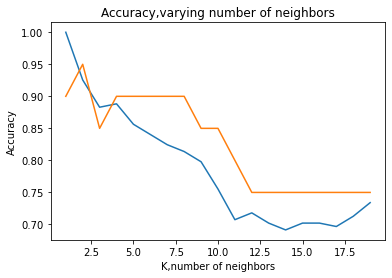

The best K value for accuracy test data:2.00
The best accuracy test data:95.00


In [13]:
#in order to get best k with the best accuracy
kArr=np.arange(1,20)
AccListTrain=[]
AccListTest=[]
for i in range(len(kArr)):
    AccListTrain.append(accuracy(KNN(X_train,X_train,Y_train,kArr[i],0.5),Y_train))
    AccListTest.append(accuracy(KNN(X_test,X_train,Y_train,kArr[i],0.5),Y_test))
#plot result,get most accurate k,the most accurate value
plt.plot(kArr,AccListTrain,label='Accuracy train data')
plt.plot(kArr,AccListTest,label='Accuracy test data')
plt.xlabel('K,number of neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy,varying number of neighbors')
plt.show()
bestAccuracyTest=max(AccListTest)
KbestAccuracyTest=AccListTest.index(bestAccuracyTest)
print("The best K value for accuracy test data:%.2f"%(kArr[KbestAccuracyTest]))
print("The best accuracy test data:%.2f"%(bestAccuracyTest*100))

<h1>Section B</h1>

<h2>1.Logistic regression classifier functions</h2>

In [14]:
#function to calculate confusion matrix according to Real labels and
#predicted labels
def calcConfMat(RealY,PredY):
    w,h=2,2
    Matrix=[[0 for x in range(w)] for y in range(h)]
    Matrix[1][1]=np.sum((RealY==0)&(PredY==RealY))
    Matrix[0][1]=np.sum((RealY==0)&(PredY!=RealY))
    Matrix[1][0]=np.sum((RealY==1)&(PredY!=RealY))
    Matrix[0][0]=np.sum((RealY==1)&(PredY==RealY))
    return Matrix

In [15]:
#function to print confusion matrix,using html
def print_matrix(mat):
    from IPython.display import HTML,display
    table='<center><h4>Confusion matrix</h4></center><br/>'
    table+='<center><table><tr><td rowspan="4" style="writing-mode:vertical-lr"><center><b>Predicted</b><center></td>'
    table+='<th colspan="3"><center><b>Truth</b></center></th></tr><tr></td><td bgcolor="LightGray"></td><th>T</th><th>F</th></tr>'
    table+=f"<tr><td>Y</td><td>{mat[0][0]}</td><td>{mat[0][1]}</td></tr>"
    table+=f"<tr></td><td>N</td><td>{mat[1][0]}</td><td>{mat[1][1]}</td></tr>"
    table+='</table></center>'
    display(HTML(table))

In [16]:
#function predicts label/classify the given data,x according to the weights and threshold,default=0.5
def pred(w, X,th=0.5):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])
        if sigmoid(z) > th:
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

In [17]:
#function returns probability for given data x according to the weights
def prob_pred(w,X):
    N=len(X)
    predict=[]
    for i in range(N):
        z=np.dot(w,X[i])
        predict.append(sigmoid(z))
    return predict

In [18]:
#function calculates true positive rate,false positive rate,using 100 points between 0 and 1
def calcForROC(x,w,Ytrain):
    th_vec=np.linspace(0,1,100)
    tpr=np.zeros(len(th_vec)) 
    fpr=np.zeros(len(th_vec))
    counter=0
    for idx in th_vec:
            fc=pred(w,x,idx)
            mat=calcConfMat(Ytrain,fc)
            tpr[counter]=mat[0][0]/(mat[0][0]+mat[1][0])
            fpr[counter]=mat[0][1]/(mat[0][1]+mat[1][1])
            counter+=1
    return tpr,fpr

<h4>Gradient descent and related functions</h4>

In [19]:
#function calculates sigmoid func. value
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [20]:
#function initializes weights according to given data dimension
def initialize_weights_vec(dimension):
    return np.zeros_like(np.arange(len(dimension)),shape=len(dimension))

In [21]:
#function to calculate cross entropy value
def CrossEntropy(y_truth,y_pred):
    CE=0.0
    for i in range(len(y_truth)):
        CE+=(y_truth[i])*np.log(y_pred[i])+(1-y_truth[i])*np.log(1-y_pred[i])
    CE/=len(y_truth)
    return -CE

In [22]:
#function to train logistic regression classifier according to weights,xtrain  ytrain data,number of iterations,learning
#show parameter,when its True it will print confusion matrix,ROC graph before starting,in the middle,at the end
#False value will not show confusion matrix,ROC graph
#the function returns weights,cross entropy saved values while training,
#pc which is accuracy while training the classifier
def logisticRegressionTraining(w,X_train,y_train,numOfIterations,alpha,show=True):
    crossE=[]
    pc=[]
    if(show):
        print("\033[1m Before training: \033[0m")
        print_matrix(calcConfMat(y_train,pred(w,X_train)))
        tpr,fpr=calcForROC(X_train,w,y_train)
        plotRoc(tpr,fpr)
    print("\033[1m Process started: \033[0m")
    for i in range(numOfIterations):
        GD=0
        for j in range(len(X_train)):
            GD+=X_train[j]*(sigmoid(np.dot(w,X_train[j]))-y_train[j])
        w = w - (alpha*GD)
        y_pred_train = prob_pred(w,X_train)
        CE = CrossEntropy(y_train,y_pred_train)
        crossE.append(CE)
        pc.append(accuracy(y_train,pred(w,X_train)))
        if(i==numOfIterations/2 and show):
            print(f"\nAfter {int(numOfIterations/2)} iterations (T/2 iterations):")
            print_matrix(calcConfMat(y_train,pred(w,X_train)))
            tpr,fpr=calcForROC(X_train,w,y_train)
            plotRoc(tpr,fpr)
        if(i%10==0 and show):
            print(f"\nitertaion {i}: cross-entropy = {CE}") 
    print("\033[1m \nFinished: \033[0m")
    if(show):
        print_matrix(calcConfMat(y_train,pred(w,X_train)))
        tpr,fpr=calcForROC(X_train,w,y_train)
        plotRoc(tpr,fpr)
    return w,crossE,pc

<h3>plot functions</h3>

In [23]:
#plot ROC graph according to true positive rate and false positive rate
def plotRoc(tpr,fpr):
    plt.plot(fpr,tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC')
    plt.grid()
    plt.show()

In [24]:
#plot cross entropy graph,cross entropy vs number of iterations.
#ce is the values saved while training the classifier
def plotCE(NumOfiterations,ce,title,dataT):
    xa = [i for i in range(NumOfiterations)]
    plt.plot(xa,ce,label=dataT)
    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('cross-entropy')
    plt.title(title)
    plt.grid()
    plt.show()

In [25]:
#plot accuracy graph,accuracy vs number of iteration
def plotAccuracy(NumOfiterations,Pc,title):
    xa = [i for i in range(NumOfiterations)]
    plt.plot(xa,Pc)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.grid()
    plt.show()

<h1>2.Logistic regression classifier implementation</h1>

<h3>Training the classifier</h3>

 Before training: 


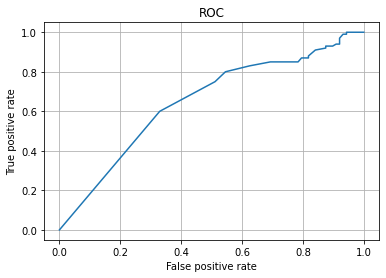

 Process started: 

itertaion 0: cross-entropy = 1.6319950509164594

itertaion 10: cross-entropy = 0.7942935059905775

itertaion 20: cross-entropy = 0.7445402500271879

itertaion 30: cross-entropy = 0.7074893204582896

itertaion 40: cross-entropy = 0.676985376188374

itertaion 50: cross-entropy = 0.652069035482727

itertaion 60: cross-entropy = 0.6317629119646632

itertaion 70: cross-entropy = 0.6151460487295826

itertaion 80: cross-entropy = 0.60141280697023

itertaion 90: cross-entropy = 0.5898994460473244

itertaion 100: cross-entropy = 0.5800839653742614

itertaion 110: cross-entropy = 0.5715695991844779

itertaion 120: cross-entropy = 0.5640616362737814

itertaion 130: cross-entropy = 0.5573440531808207

itertaion 140: cross-entropy = 0.5512592408392412

itertaion 150: cross-entropy = 0.5456918742750178

itertaion 160: cross-entropy = 0.5405567642399375

itertaion 170: cross-entropy = 0.5357900321252304

itertaion 180: cross-entropy = 0.5313428495122576

itertaion 190: cross-entro

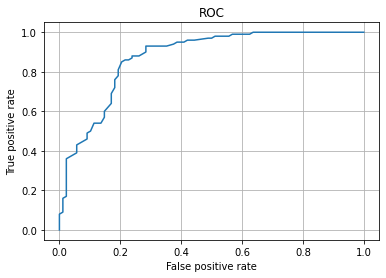


itertaion 500: cross-entropy = 0.4622658192726638

itertaion 510: cross-entropy = 0.46117504680900995

itertaion 520: cross-entropy = 0.4601145713263345

itertaion 530: cross-entropy = 0.4590829406816462

itertaion 540: cross-entropy = 0.45807879151201625

itertaion 550: cross-entropy = 0.4571008429176601

itertaion 560: cross-entropy = 0.4561478906502626

itertaion 570: cross-entropy = 0.45521880176172297

itertaion 580: cross-entropy = 0.45431250967290693

itertaion 590: cross-entropy = 0.45342800962592694

itertaion 600: cross-entropy = 0.4525643544869533

itertaion 610: cross-entropy = 0.45172065086969515

itertaion 620: cross-entropy = 0.4508960555524745

itertaion 630: cross-entropy = 0.45008977216433627

itertaion 640: cross-entropy = 0.4493010481178729

itertaion 650: cross-entropy = 0.4485291717684764

itertaion 660: cross-entropy = 0.44777346978156085

itertaion 670: cross-entropy = 0.4470333046909262

itertaion 680: cross-entropy = 0.4463080726329409

itertaion 690: cross-e

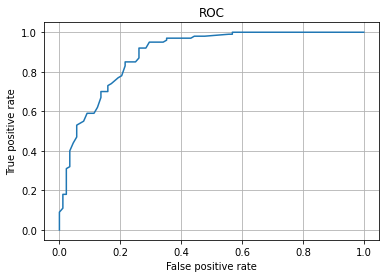

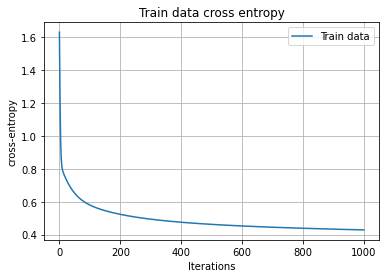

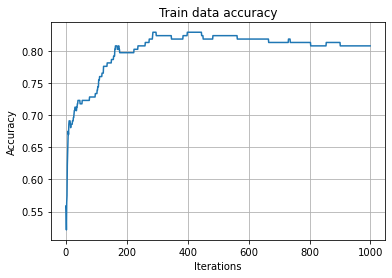

In [26]:
#initialize weights with random values
alpha=0.001
NumOfIterations=1000
xTrainWOnes,xTestWOnes=addOnesCol(X_train,X_test,Y_test,Y_train)
wRand = np.random.randn(61)
wRandRes,CEwRand,pcwRand=logisticRegressionTraining(wRand,xTrainWOnes,Y_train,NumOfIterations,alpha)
plotCE(NumOfIterations,CEwRand,'Train data cross entropy','Train data')
plotAccuracy(NumOfIterations,pcwRand,'Train data accuracy')

 Before training: 


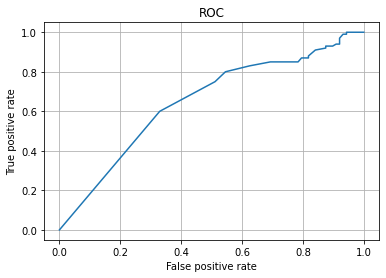

 Process started: 

itertaion 0: cross-entropy = 1.6319950509164594

itertaion 10: cross-entropy = 0.7942935059905775

itertaion 20: cross-entropy = 0.7445402500271879

itertaion 30: cross-entropy = 0.7074893204582896

itertaion 40: cross-entropy = 0.676985376188374

After 50 iterations (T/2 iterations):


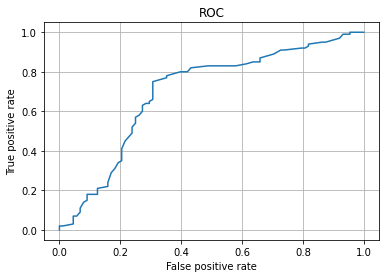


itertaion 50: cross-entropy = 0.652069035482727

itertaion 60: cross-entropy = 0.6317629119646632

itertaion 70: cross-entropy = 0.6151460487295826

itertaion 80: cross-entropy = 0.60141280697023

itertaion 90: cross-entropy = 0.5898994460473244
 
Finished: 


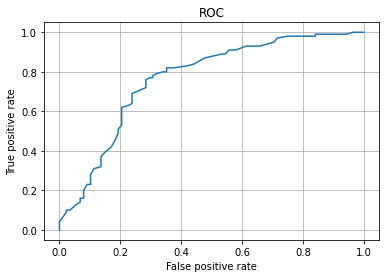

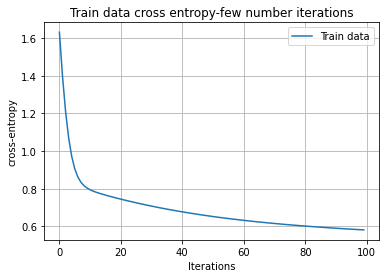

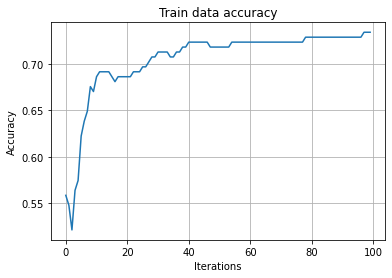

In [27]:
NumOfIterationsTest1=100
wRandResTest1,CEwRandTest1,pcwRandTest1=logisticRegressionTraining(wRand,xTrainWOnes,Y_train,NumOfIterationsTest1,alpha)
plotCE(NumOfIterationsTest1,CEwRandTest1,'Train data cross entropy-few number iterations','Train data')
plotAccuracy(NumOfIterationsTest1,pcwRandTest1,'Train data accuracy')

 Before training: 


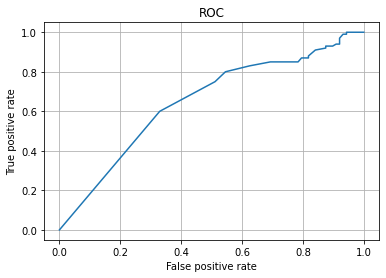

 Process started: 

itertaion 0: cross-entropy = 1.6319950509164594

itertaion 10: cross-entropy = 0.7942935059905775

itertaion 20: cross-entropy = 0.7445402500271879

itertaion 30: cross-entropy = 0.7074893204582896

itertaion 40: cross-entropy = 0.676985376188374

itertaion 50: cross-entropy = 0.652069035482727

itertaion 60: cross-entropy = 0.6317629119646632

itertaion 70: cross-entropy = 0.6151460487295826

itertaion 80: cross-entropy = 0.60141280697023

itertaion 90: cross-entropy = 0.5898994460473244

itertaion 100: cross-entropy = 0.5800839653742614

itertaion 110: cross-entropy = 0.5715695991844779

itertaion 120: cross-entropy = 0.5640616362737814

itertaion 130: cross-entropy = 0.5573440531808207

itertaion 140: cross-entropy = 0.5512592408392412

itertaion 150: cross-entropy = 0.5456918742750178

itertaion 160: cross-entropy = 0.5405567642399375

itertaion 170: cross-entropy = 0.5357900321252304

itertaion 180: cross-entropy = 0.5313428495122576

itertaion 190: cross-entro

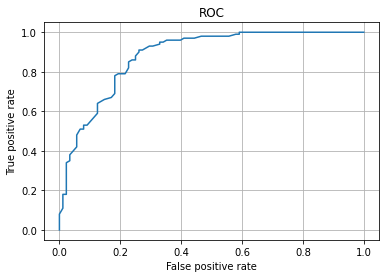


itertaion 750: cross-entropy = 0.44160499825726435

itertaion 760: cross-entropy = 0.44098089314129524

itertaion 770: cross-entropy = 0.44036749546660153

itertaion 780: cross-entropy = 0.43976444283754773

itertaion 790: cross-entropy = 0.4391713898792602

itertaion 800: cross-entropy = 0.4385880072691308

itertaion 810: cross-entropy = 0.43801398083123166

itertaion 820: cross-entropy = 0.43744901068911446

itertaion 830: cross-entropy = 0.43689281047280515

itertaion 840: cross-entropy = 0.4363451065761484

itertaion 850: cross-entropy = 0.4358056374609476

itertaion 860: cross-entropy = 0.4352741530046209

itertaion 870: cross-entropy = 0.434750413888348

itertaion 880: cross-entropy = 0.43423419102291033

itertaion 890: cross-entropy = 0.4337252650096398

itertaion 900: cross-entropy = 0.4332234256340821

itertaion 910: cross-entropy = 0.43272847139016635

itertaion 920: cross-entropy = 0.43224020903282767

itertaion 930: cross-entropy = 0.4317584531571863

itertaion 940: cross-

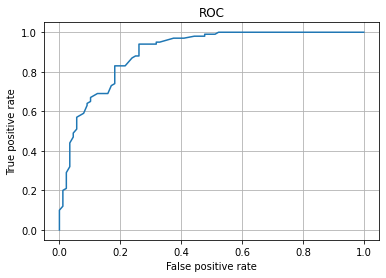

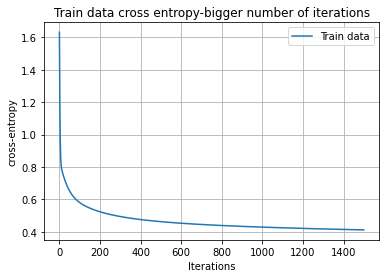

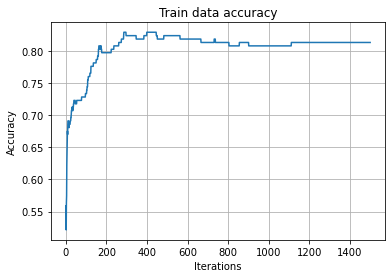

In [28]:
NumOfIterationsTest2=1500
wRandResTest2,CEwRandTest2,pcwRandTest2=logisticRegressionTraining(wRand,xTrainWOnes,Y_train,NumOfIterationsTest2,alpha)
plotCE(NumOfIterationsTest2,CEwRandTest2,'Train data cross entropy-bigger number of iterations','Train data')
plotAccuracy(NumOfIterationsTest2,pcwRandTest2,'Train data accuracy')

 Before training: 


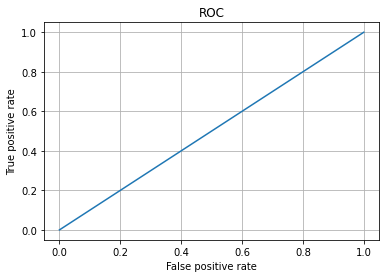

 Process started: 

itertaion 0: cross-entropy = 0.6890639494497568

itertaion 10: cross-entropy = 0.6711034848148077

itertaion 20: cross-entropy = 0.6566997696469504

itertaion 30: cross-entropy = 0.6440769775477448

itertaion 40: cross-entropy = 0.6328254943864375

itertaion 50: cross-entropy = 0.6226706421928944

itertaion 60: cross-entropy = 0.6134213213646444

itertaion 70: cross-entropy = 0.6049390141567405

itertaion 80: cross-entropy = 0.5971191093912503

itertaion 90: cross-entropy = 0.5898795753222723

itertaion 100: cross-entropy = 0.5831539933535989

itertaion 110: cross-entropy = 0.5768871845823884

itertaion 120: cross-entropy = 0.5710323887828543

itertaion 130: cross-entropy = 0.5655493838979228

itertaion 140: cross-entropy = 0.5604031849618559

itertaion 150: cross-entropy = 0.5555631080436303

itertaion 160: cross-entropy = 0.5510020706608982

itertaion 170: cross-entropy = 0.5466960505445079

itertaion 180: cross-entropy = 0.5426236544123818

itertaion 190: cross-e

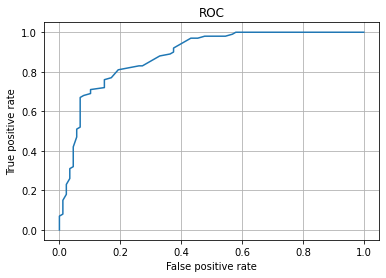


itertaion 500: cross-entropy = 0.4733838091258379

itertaion 510: cross-entropy = 0.47217717371846574

itertaion 520: cross-entropy = 0.47100018088757917

itertaion 530: cross-entropy = 0.469851588916227

itertaion 540: cross-entropy = 0.468730226722463

itertaion 550: cross-entropy = 0.4676349888930082

itertaion 560: cross-entropy = 0.46656483112817015

itertaion 570: cross-entropy = 0.46551876605906817

itertaion 580: cross-entropy = 0.46449585940231747

itertaion 590: cross-entropy = 0.46349522642099944

itertaion 600: cross-entropy = 0.46251602866397423

itertaion 610: cross-entropy = 0.46155747095844013

itertaion 620: cross-entropy = 0.460618798633197

itertaion 630: cross-entropy = 0.4596992949523268

itertaion 640: cross-entropy = 0.45879827874099005

itertaion 650: cross-entropy = 0.4579151021868524

itertaion 660: cross-entropy = 0.45704914880223096

itertaion 670: cross-entropy = 0.45619983153346455

itertaion 680: cross-entropy = 0.4553665910053201

itertaion 690: cross-e

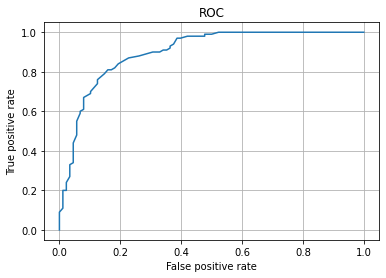

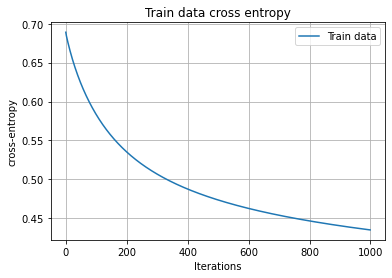

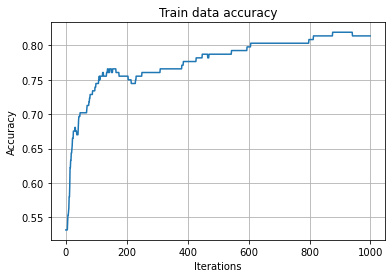

In [29]:
#initialize weights as 0.
NumOfIterations=1000
w0 = initialize_weights_vec(xTrainWOnes[0])
wI0,CEI0,pcI0=logisticRegressionTraining(w0,xTrainWOnes,Y_train,NumOfIterations,alpha)
plotCE(NumOfIterations,CEI0,'Train data cross entropy','Train data')
plotAccuracy(NumOfIterations,pcI0,'Train data accuracy')

<h3>Implement classifier with test data,calculate accuracy,ROC,Confusion matrix</h3>

Classifier accuracy test data:90.00


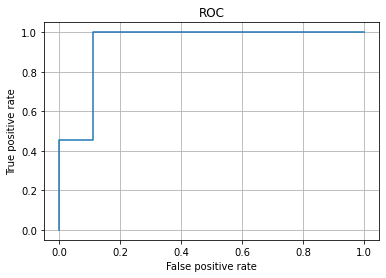

In [30]:
#with random weights:
TestAcc=accuracy(Y_test,pred(wRandRes,xTestWOnes))
print("Classifier accuracy test data:%.2f"%(TestAcc*100))
TestTpr,TestFpr=calcForROC(xTestWOnes,wRandRes,Y_test)
plotRoc(TestTpr,TestFpr)
TestMatrix=calcConfMat(Y_test,pred(wRandRes,xTestWOnes))
print_matrix(TestMatrix)

Classifier accuracy test data:90.00


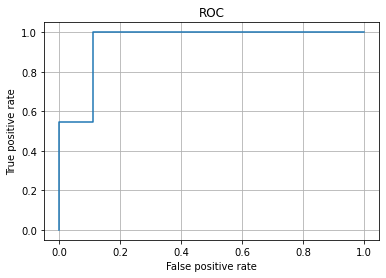

In [31]:
#with 0 initialized weights:
TestAccI0=accuracy(Y_test,pred(wI0,xTestWOnes))
print("Classifier accuracy test data:%.2f"%(TestAccI0*100))
TestTprI0,TestFprI0=calcForROC(xTestWOnes,wI0,Y_test)
plotRoc(TestTprI0,TestFprI0)
TestMatrixI0=calcConfMat(Y_test,pred(wI0,xTestWOnes))
print_matrix(TestMatrixI0)

In [32]:
#different data each iteration in order to calculate average accuracy for classifier:
from sklearn.model_selection import KFold
AccListN=[]
def splitDataToFolds():
    dd=pd.read_csv('sonar data.csv',header=None)
    XdataT=dd.iloc[:,:-1].to_numpy()
    YdataT=dd.iloc[:,-1].to_numpy()
    folds=KFold(n_splits=4,shuffle=True)
    for trainIdx,testIdx in folds.split(XdataT):
        XTrainData,XTestData=XdataT[trainIdx],XdataT[testIdx]
        YTrainData,YTestData=YdataT[trainIdx],YdataT[testIdx]
        XTrainDataO,XTestDataO=addOnesCol(XTrainData,XTestData,YTestData,YTrainData)
        YTestData[YTestData=='R']=0
        YTestData[YTestData=='M']=1
        YTrainData[YTrainData=='R']=0
        YTrainData[YTrainData=='M']=1
        alpha=0.01
        Iter=1000
        wN0 = np.random.randn(61)
        wN,CEN,PCN=logisticRegressionTraining(wN0,XTrainDataO,YTrainData,Iter,alpha,False)
        AccListN.append(accuracy(YTestData,pred(wN,XTestDataO)))
    return sum(AccListN)/len(AccListN)

AVGAcc=splitDataToFolds()
print("Average accuracuy is :%.2f"%(AVGAcc*100))

 Process started: 
 
Finished: 
 Process started: 
 
Finished: 
 Process started: 
 
Finished: 
 Process started: 
 
Finished: 
Average accuracuy is :76.44


<h1>Section C</h1>

<h3>KNN classifier implementation with normalized data</h3>

In [33]:
k=3
KNNResultNorTrain=KNN(normalizedXtrain,normalizedXtrain,Y_train,k,0.5)
KNNResultNorTest=KNN(normalizedXtest,normalizedXtrain,Y_train,k,0.5)
KNNNorTrainAcc=accuracy(Y_train,KNNResultNorTrain)
KNNNorTestAcc=accuracy(Y_test,KNNResultNorTest)
print("Classifier accuracy normalized train data:%.2f"%(KNNNorTrainAcc*100))
print("Classifier accuracy normalized test data:%.2f"%(KNNNorTestAcc*100))

Classifier accuracy normalized train data:94.15
Classifier accuracy normalized test data:100.00


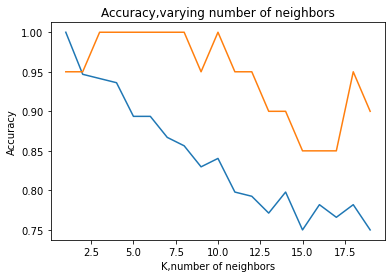

The best K value for accuracy test normalized data:3.00
The best accuracy test normalized data:100.00


In [34]:
kArr=np.arange(1,20)
AccListNorTrain=[]
AccListNorTest=[]
for i in range(len(kArr)):
    AccListNorTrain.append(accuracy(KNN(normalizedXtrain,normalizedXtrain,Y_train,kArr[i],0.5),Y_train))
    AccListNorTest.append(accuracy(KNN(normalizedXtest,normalizedXtrain,Y_train,kArr[i],0.5),Y_test))
plt.plot(kArr,AccListNorTrain,label='Accuracy normalized train data')
plt.plot(kArr,AccListNorTest,label='Accuracy normalized test data')
plt.xlabel('K,number of neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy,varying number of neighbors')
plt.show()
bestAccuracyTestN=max(AccListNorTest)
KbestAccuracyTestN=AccListNorTest.index(bestAccuracyTestN)
print("The best K value for accuracy test normalized data:%.2f"%(kArr[KbestAccuracyTestN]))
print("The best accuracy test normalized data:%.2f"%(bestAccuracyTestN*100))

<h3>Logistic regression classifier implementation with normalized data</h3>

 Before training: 


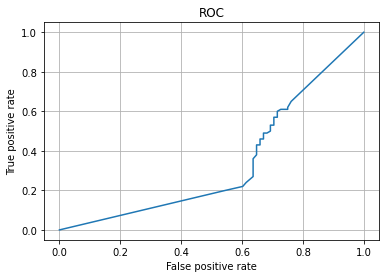

 Process started: 

itertaion 0: cross-entropy = 4.200586784303413

itertaion 10: cross-entropy = 1.0689655302678005

itertaion 20: cross-entropy = 0.7274454723619013

itertaion 30: cross-entropy = 0.6104917965045112

itertaion 40: cross-entropy = 0.5426317523002929

itertaion 50: cross-entropy = 0.496903538655845

itertaion 60: cross-entropy = 0.462901681538874

itertaion 70: cross-entropy = 0.43610169129300047

itertaion 80: cross-entropy = 0.41416641210673366

itertaion 90: cross-entropy = 0.39572341517384374

itertaion 100: cross-entropy = 0.3799117937539655

itertaion 110: cross-entropy = 0.36616746380563575

itertaion 120: cross-entropy = 0.35410343815561846

itertaion 130: cross-entropy = 0.34344026722204796

itertaion 140: cross-entropy = 0.33396571511646866

After 150 iterations (T/2 iterations):


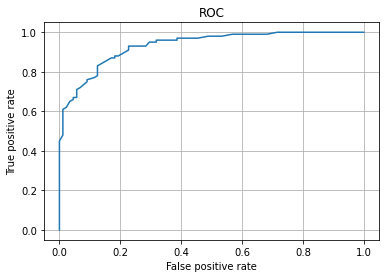


itertaion 150: cross-entropy = 0.325511453051604

itertaion 160: cross-entropy = 0.3179394169380624

itertaion 170: cross-entropy = 0.31113357891134896

itertaion 180: cross-entropy = 0.30499481765506226

itertaion 190: cross-entropy = 0.2994376423557552

itertaion 200: cross-entropy = 0.2943880341294454

itertaion 210: cross-entropy = 0.28978191664181835

itertaion 220: cross-entropy = 0.285563940822447

itertaion 230: cross-entropy = 0.28168641562263175

itertaion 240: cross-entropy = 0.2781083222270889

itertaion 250: cross-entropy = 0.27479440410297273

itertaion 260: cross-entropy = 0.27171434252782717

itertaion 270: cross-entropy = 0.2688420259337761

itertaion 280: cross-entropy = 0.26615491483475906

itertaion 290: cross-entropy = 0.2636334981419118
 
Finished: 


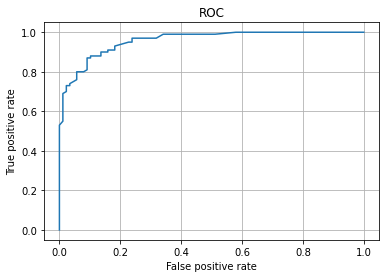

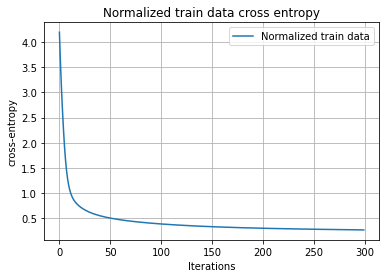

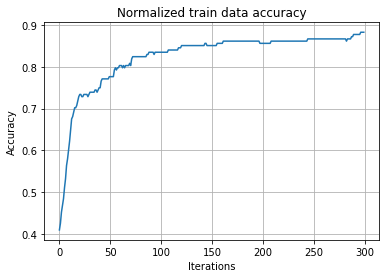

In [35]:
normalizedXtrain_Up,normalizedXtest_Up=addOnesCol(normalizedXtrain,normalizedXtest,Y_test,Y_train)
IterationsForNor=300
wNor = np.random.randn(61)
wNormalizedData,CENor,PCNor=logisticRegressionTraining(wNor,normalizedXtrain_Up,Y_train,IterationsForNor,alpha,True)
plotCE(IterationsForNor,CENor,'Normalized train data cross entropy','Normalized train data')
plotAccuracy(IterationsForNor,PCNor,'Normalized train data accuracy')

Classifier accuracy test data:85.00


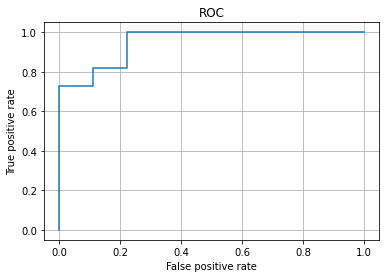

In [36]:
NorTestAcc=accuracy(Y_test,pred(wNormalizedData,normalizedXtest_Up))
print("Classifier accuracy test data:%.2f"%(NorTestAcc*100))
NorTestTpr,NorTestFpr=calcForROC(normalizedXtest_Up,wNormalizedData,Y_test)
plotRoc(NorTestTpr,NorTestFpr)
NorTestMatrix=calcConfMat(Y_test,pred(wNormalizedData,normalizedXtest_Up))
print_matrix(NorTestMatrix)

 Before training: 


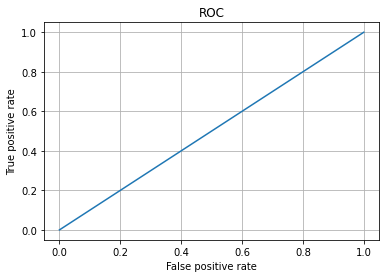

 Process started: 

itertaion 0: cross-entropy = 0.6063736785542096

itertaion 10: cross-entropy = 0.44563833998173935

itertaion 20: cross-entropy = 0.40346597758890274

itertaion 30: cross-entropy = 0.37945514474758735

itertaion 40: cross-entropy = 0.36286266883201457

itertaion 50: cross-entropy = 0.35024764292840643

itertaion 60: cross-entropy = 0.3400995010317494

itertaion 70: cross-entropy = 0.3316308851757884

itertaion 80: cross-entropy = 0.3243811826538545

itertaion 90: cross-entropy = 0.3180573285573484

itertaion 100: cross-entropy = 0.3124606970300173

itertaion 110: cross-entropy = 0.30744999195042017

itertaion 120: cross-entropy = 0.30292085458580176

itertaion 130: cross-entropy = 0.29879390149806295

itertaion 140: cross-entropy = 0.29500731230597504

After 150 iterations (T/2 iterations):


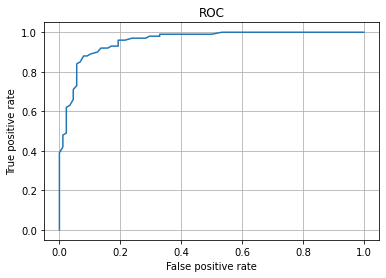


itertaion 150: cross-entropy = 0.29151201873546373

itertaion 160: cross-entropy = 0.2882684570407339

itertaion 170: cross-entropy = 0.2852443018963661

itertaion 180: cross-entropy = 0.2824128403879694

itertaion 190: cross-entropy = 0.27975177754512437

itertaion 200: cross-entropy = 0.2772423412876777

itertaion 210: cross-entropy = 0.274868600317498

itertaion 220: cross-entropy = 0.2726169367187189

itertaion 230: cross-entropy = 0.27047563303704514

itertaion 240: cross-entropy = 0.26843454542409734

itertaion 250: cross-entropy = 0.26648484238445524

itertaion 260: cross-entropy = 0.2646187941370552

itertaion 270: cross-entropy = 0.262829601447427

itertaion 280: cross-entropy = 0.2611112555363

itertaion 290: cross-entropy = 0.2594584226669097
 
Finished: 


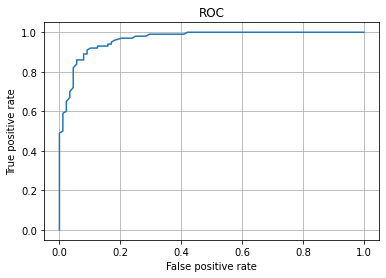

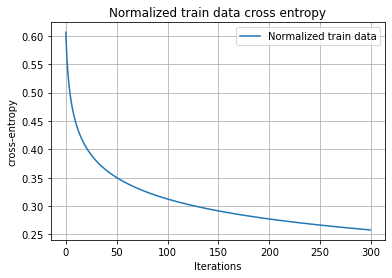

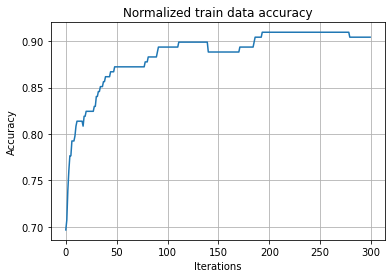

Classifier accuracy test data:95.00


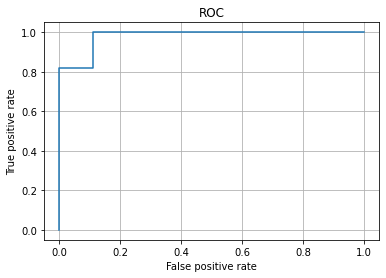

In [37]:
IterationsForNorW0=300
wNor0 = initialize_weights_vec(xTrainWOnes[0])
wNormalizedData0,CENor0,PCNor0=logisticRegressionTraining(wNor0,normalizedXtrain_Up,Y_train,IterationsForNorW0,alpha,True)
plotCE(IterationsForNorW0,CENor0,'Normalized train data cross entropy','Normalized train data')
plotAccuracy(IterationsForNorW0,PCNor0,'Normalized train data accuracy')
#test data
NorTestAcc0=accuracy(Y_test,pred(wNormalizedData0,normalizedXtest_Up))
print("Classifier accuracy test data:%.2f"%(NorTestAcc0*100))
NorTestTpr0,NorTestFpr0=calcForROC(normalizedXtest_Up,wNormalizedData0,Y_test)
plotRoc(NorTestTpr0,NorTestFpr0)
NorTestMatrix0=calcConfMat(Y_test,pred(wNormalizedData0,normalizedXtest_Up))
print_matrix(NorTestMatrix0)